# <div align="center">  Titanic Machine Learning Project Overview  </div>

# Background

### Titanic Disaster
In the early morning of April the 15th, 1912, the RMS Titanic was lost to the North Atlantic Ocean. Shortly after striking an iceberg the Titanic faded into it's watery grave along with over 1500 unfortunate passengers. 

### Kaggle
The famous Kaggle *Titanic - Machine Learning from Disaster* competition asks participants to use machine learning methods to "predict" who lived through the disaster and who didn't based on various socio-economic factors. Data points on these factors are provided in the supplied dataset.

### Notebooks Referenced

- This note book is based on Jason Chong's Titanic: Machine Learning from Disaster tutoial notebook. An article explaining the notebook and the proccesses he used can be found [here] (https://towardsdatascience.com/comprehensive-beginners-guide-to-kaggle-titanic-survival-prediction-competition-solution-21c5be2cec2c). 
- Other notebooks referenced for the completion of my notebook include...
 - fdsaf
- Additional references are listed throughout this note book.
 
# Objective

- #### Determine factors that influenced the probability that an individual survived or perished.

- #### Build a model to predict who lived and who died based on the determined factors.

# Project Workflow

### 1. Understand the data

#### - 1.1 Data types
#### - 1.2 Shape
#### - 1.3 Missing values
- 1.3.1 Addressing Missing Values

### 2. Exploratory Data Analysis

#### - 2.1  Descriptive Statistics
#### - 2.2  Exploring Catagorical Variables
#### - 2.3  Exploring Numerical Variables
#### - 2.4  Correlation

### 3. Feature Engineering and Data Pre-proccesing

#### - 3.1 Feature engineering
#### - 3.2 Data Pre-processing

### 4. Training Models

#### - Choose which models to train

### 5. Evaluate models

#### - Cross validation
#### - Tune Model

### 6. Show Final Results and Report Model Accuracy

### 7. After Action Report

#### - Tweaking techniques for increased performance

#### - Next Steps

#### - Final Conclusion




## Importing packages/modules/data

In [153]:
#Main packages 
import pandas as pd
import numpy as np

#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#Data conversion
from sklearn.preprocessing import KBinsDiscretizer

#Pretty
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FormatStrFormatter

#Dictionary Counter
from collections import Counter

#Machine learning packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Model Testing and Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

#Remove warnings 
import warnings
warnings.filterwarnings('ignore')

#Stats
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
#Importing the data set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") 

## 1. Understanding the Dataset

## Hypothesis

- Sex is an important determining factor for survival outcome.
- Ticket class is an important determining factor for survival outcome.  

The Survived column shows the fate of each passenger. This is the dependent variable that I am interested in predicting. Although this column contains numeric data, it reperesents catagorical data with 1 indicating survived and 0 representing did not survive. Since the model will be predicting if a passenger died or did not die, this is a classification problem.   

The available data provides a measure for sex and socioeconomic status (multiple columns). It is likely that these factors determined if a passenger died or not. Other factors worth looking into might be age and family make up. There could be multicolinearity between some of the independent variables because they look to be related to each other. For example, both ticket Fare and Pclass are a measure of socioeconomic status. If multicolinearity is likely to skew the impact that each of the independent variables have on the dependent variable, than some columns may need to be dropped. 


### Data Dictionary
This data dictionary was constructed from the one found on the [Kaggle Titanic Competition Page](https://www.kaggle.com/c/titanic/data?select=train.csv)

  | Variable | Definition                     | Key                                       |
|----------|--------------------------------|-------------------------------------------|
| survival | Survival                       | 0=No, 1=Yes                               |
| pclass   | Ticket Class                   | 1=1st, 2=2nd, 3=3rd                       |
| sex      | Sex                            | Sex                                       |
| Age      | Age(Years)                     |                                           |
| sibsp    | # of siblings / spouses aboard |                                           |
| parch    | # of parents / children aboard |                                           |
| ticket   | Ticket number                  |                                           |
| fare     | Passenger fare                 |                                           |
| cabin    | Cabin number                   |                                           |
| embarked | Port of Embarkation            | C=Cherbourg, Q=QueensTown, S=SouthHampton |

In [155]:
#First five rows train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
#First five rows test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1.1 Data Types 

#### Categorical
    PassengerId
    Name
    Sex
    Ticket
    Cabin
    Embarked 
    Pclass
    
#### Numerical 
    Age
    Fare
    Sibsp
    Parch
    
    

### 1.2 Shape

In [157]:
#Training set is 891 rows x 12 columns
train.shape


(891, 12)

In [158]:
#Test set is 418 rows x 11 columns
#The missing column from this set is the Survived column.
test.shape

(418, 11)

### 1.3 Missing Values

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [161]:
print('-'*20)
print("Training Nulls")
print('-'*20)
print(train.isnull().sum().sort_values())
print('-'*20)
print("Test Nulls")
print('-'*20)
print(test.isnull().sum().sort_values())
print("-"*20)

--------------------
Training Nulls
--------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64
--------------------
Test Nulls
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64
--------------------



There is a lot of missing data in the age and cabin columns. This data will have to either be imputed or the columns will need to be dropped.  

### 1.3.1 Addressing missing values

#### Cabin number
 There isn't enough data available regarding cabin number to fill in the missing values. This may have been useful for my model. It's hard to say. I would like to see exactly what some of the data that is present in this set looks like.

In [162]:
cabin_data = train[train["Cabin"].isnull() == False]
cabin_data['Cabin']


1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

It appears that the cabin number begins with a letter indicating the deck. This data would be useful for determining how location affected the probability of passenger survival. We know that Pclass is a measure of socioeconomic status and we also know that different decks were carved out for people who purchased more expensive tickets. This means that I can get some of the insight that the cabin data may have provided out of the Pclass data. Still, it's a shame that there isn't more complete cabin data. Due to the lack of data the cabin column will need to be dropped. 

In [163]:
train = train.drop("Cabin", axis = 1)

In [164]:
test = test.drop("Cabin", axis = 1)

#### Age
There is plenty of data available in the age column to impute missing values. There are multiple ways to do this. A simple way is to just compute the average of the age column and use that number to fill in the missing values. This method can be susceptible to the effects of outlier, but since the human lifespan is set within a relatively narrow range, this is unlikely to impact the data significantly. The other option is to use other features to try to reverse engineer the age. I will perform both of these methods and compare the results. To reverse engineer the age, I will do the following.

- Find out what features most highly correlate with age. 
- Once these features are discovered, I can loop through the rows with missing ages and fill that missing data in with the average age of people in the data set who have similar features. 

Let me start by computing the average age to use as a baseline for checking how these two methods compare.

In [165]:
# Combine datasets 
combined = pd.concat([train, test], axis = 0).reset_index(drop=True)
combined_copy = combined
combined_copy["Age"].fillna(combined["Age"].mean())
print("Average Age (Mean imputation): {avgage}".format(avgage = combined_copy["Age"].mean()))

Average Age (Mean imputation): 29.881137667304014


In [166]:
# Encoding sex to numeric. Changing label to is_male, 0 = False 1 = True.
combined['is_male'] = combined['Sex'].map({'male': 1, 'female': 0})

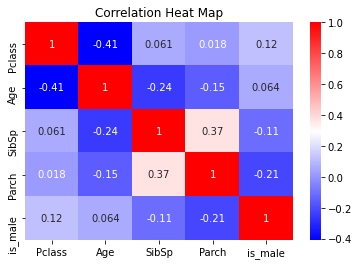

In [167]:
# Dropping non numeric columns and columns with continuous data that will be hard to match on during the loop.
# (i.g, It would be difficult to use fare here, because matching two different rows on the cost of a ticket down 
# to the penny is not likely.)
sns.heatmap(combined.drop(["Survived", "Name", "PassengerId","Fare", "Sex", "Ticket", "Embarked"], axis=1).corr(),cmap = "bwr", annot = True)
plt.title("Correlation Heat Map")
plt.show()

There is not a strong correlation between age and sex. There are stronger correlations between age and pclass, sibsp,and parch. Therefore, these features will be my predictors for age in rows where age is missing.

In [168]:
missing_ages = combined[combined['Age'].isnull()]
missing_age_indices = list(missing_ages.index)

for index in missing_age_indices:
    median_age = combined["Age"].median()
    # Filtering for all rows in the age column from the combined dataframe where the number of siblings,
    # parents and children, as well as p class are the same as the current row that is being iterating over. This
    # row comes from the index of rows which have a missing age value. 
    predicted_age = combined["Age"][((combined['SibSp'] == combined.iloc[index]['SibSp'])
                                    &(combined['Parch'] == combined.iloc[index]['Parch'])
                                    &(combined['Pclass'] == combined.iloc[index]['Pclass']))].median()
    #If there is no match between the features of the row that is being iterated over and the rows in the rest
    #of the data set, then set the missing value to the median age. 
    if np.isnan(predicted_age):
        combined["Age"].iloc[index] = median_age
    else:
        combined["Age"].iloc[index] = predicted_age

In [169]:
print("Average Age: {avgage}".format(avgage = combined["Age"].mean()))

Average Age: 29.179656226126813


It doesn't look like there was a big difference between these two methods of imputing age. Using mean imputation would have sufficed.

#### Fare 
There is a single missing value in the fare column. Since, there is only one row with a missing value I will simply impute the middle fare value of the data set. It's best to use the median in this case, because it is more forgiving when dealing with data that has the potential to have large outliers. The sky is the limit for the cost of a ticket. 




In [170]:
combined["Fare"].fillna(combined["Fare"].median(), inplace = True)

#### Embarked
There are two missing values in embarked. I will fill in those missing values with the most frequent value in the dataset.



In [171]:
combined["Embarked"].fillna(combined["Embarked"].mode()[0], inplace = True)

In [172]:
#There are no more missing values in the dataset. 
print(combined.isnull().sum().sort_values())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
is_male          0
Survived       418
dtype: int64


## 2. Exploratory Data Analysis

### 2.1 Descriptive Statistics

In [173]:
combined.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_male
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.179656,0.498854,0.385027,33.281086,0.644003
std,378.020061,0.486592,0.837836,13.269138,1.041658,0.865560,51.741500,0.478997
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000



The above chart provides a quick overview of some statistics. Here is what jumps out to me. 

- Survival Rate of the passengers in this dataset is around 38%
- Average passenger age of this dataset was around 29 years old 
- The average fare in this dataset was \\$33. The max fare was around \\$512. The large difference between the first three quartiles and the max indicates that the data is right skewed. The mean fare is double the median fare! This will need to be looked into further later.
- 64 percent of passengers in this dataset were male. 




### 2.2 Exploring Catagorical Variables

#### Gender and Survival

In [174]:
combined[["Sex", "Survived"]].groupby("Sex", as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


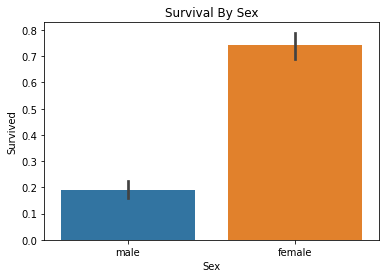

In [175]:
sns.barplot(x = "Sex", y = "Survived", data = combined)
plt.title("Survival By Sex")
plt.show()

Many more women survived this disaster than men. 

#### Passenger Class and Survival


In [176]:
combined[["Pclass", "Survived"]].groupby("Pclass", as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


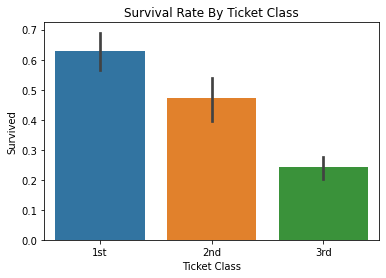

In [177]:
sns.barplot(x = "Pclass", y = "Survived", data = combined)
plt.title("Survival Rate By Ticket Class")
plt.xlabel("Ticket Class")
plt.xticks(ticks = [0,1,2], labels = ["1st","2nd","3rd"])
plt.show()

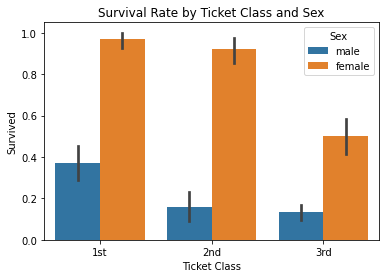

In [178]:
sns.barplot(x = "Pclass", y = "Survived", data = combined, hue = "Sex")
plt.title("Survival Rate by Ticket Class and Sex") 
plt.xlabel("Ticket Class")
plt.xticks(ticks = [0,1,2], labels = ["1st","2nd","3rd"])
plt.show()

In [179]:
# Create DataFrame to hold information for graph showing wealthy females, number of children/parents, and survival rate..
female_only = combined[combined["Sex"] == "female"]
female_only_rich = female_only[female_only["Pclass"] == 1]
female_only_rich.head()
female_only_rich[["Survived", "Parch"]].groupby("Parch", as_index = False).mean()

,Parch,Survived
0,0,0.984375
1,1,1.000000
2,2,0.846154
3,3,NaN
4,4,NaN


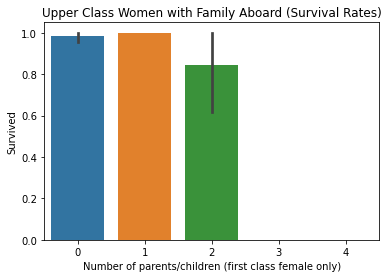

In [180]:
ax = sns.barplot(x = "Parch", y = "Survived", data = female_only_rich)
ax.set(xlabel="Number of parents/children (first class female only)", ylabel = "Survived")
plt.title("Upper Class Women with Family Aboard (Survival Rates)")
plt.show()

My observations regarding passenger class and survival are as follows...

- Overall, 1st class passengers fared signinficanly better over 2nd and 3rd class passengers. 

- Overall, 1st class passengers were more likely to survive than to perish.

- Overall, 2nd class passengers chance of survival was about a coin toss. 

- Overall, 3rd class passengers had a 75% chance of death.

- A very clear trend emerges when survival rate is broken down by both Sex and Pclass. All females generally fared better than men regardless of class. Even the lowest class female passengers had a higher chance of survival than first class men. 

- 1st class passengers that were Female had an over 90% change of Survival

- There does not seem to be any clear difference in probability regarding the survival of 1st class females with parents/children aboard vs without.

#### Point of Entry and Survival


In [181]:
combined[["Embarked", "Survived"]].groupby("Embarked", as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


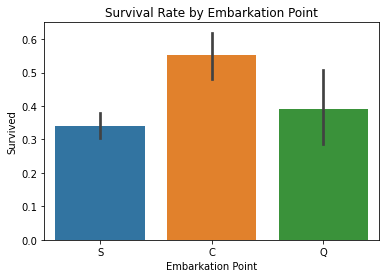

In [182]:
sns.barplot(x = "Embarked", y = "Survived", data = combined)
plt.title("Survival Rate by Embarkation Point")
plt.xlabel("Embarkation Point")
plt.show()


Of the passengers in the data set, those who embarked at Cherbourg fared better than those who boarded at the other locations. There may be a relation between passenger class and point of entry that can explain the increased likelihood of survival for passengers who embarkd at Cherbourg. To find out I will conduct a Chi squared test for independence.

In [183]:
cross_tab = pd.crosstab(combined.Pclass, combined.Embarked, margins = True)
cross_tab

Embarked,C,Q,S,All
Pclass,,,,
1,141,3,179,323
2,28,7,242,277
3,101,113,495,709
All,270,123,916,1309


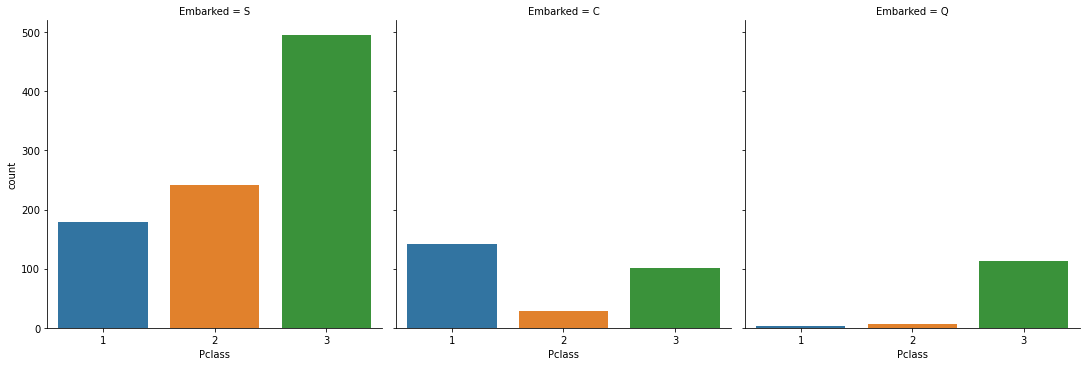

In [184]:
sns.factorplot('Pclass', col = 'Embarked', data = combined, kind = 'count')
plt.show()

From the cross tabulation alone it can be seen that S has more third class passengers than 1st and C has more 1st class passengers than 3rd. 



A chi squared test for independence between Pclass and Embarked shows that it is highly likely these variables are related.

In [185]:
observed_values = np.array([cross_tab.iloc[0][0:3].values, cross_tab.iloc[1][0:3].values, cross_tab.iloc[2][0:3].values])
chi = stats.chi2_contingency(observed_values[0:3])
print("chi squared: {chi}\n pvalue: {pval}\n degrees of freedom: {df}\n".format(chi = chi[0], pval = chi[1], df = chi[2]))

chi squared: 204.48431967559742
 pvalue: 4.0799162291284984e-43
 degrees of freedom: 4



There conclusion that can be drawn from the analysis of the relationship between class and embarked is that passenger class is likely influencing the correlation between Embarked and Survived. It appears that passenger class is acting as a moderator variable.

## 2.3 Exploring Numerical Variables

Heatmaps and correlation tables are often used to display the relationships between continous data. I will be using Pearson's correlation coeffecient to do this. One of the assumptions of Pearson's correlation coeffecient is that there are no outliers in the dataset. Outliers can cause problems with the accuracy of predictive models, so I will be removing these using Tukey's method. An overview of the method can be viewed [here](https://www.statisticshowto.com/statistics-basics/find-outliers/). 

In [186]:
#Tukey Fences

#data = dataframe
#n = cut off for the frequencies of outliers found in each row
#columns = columns of interest in df.

def tukey_fences(data, n, columns):
    outlier_indices = []
    for item in columns:
        first_quartile = np.percentile(data[item], 25) 
        third_quartile = np.percentile(data[item], 75)
        inter_quartile_range = third_quartile - first_quartile
        fence = inter_quartile_range * 1.5
        #Creates a list of indeces of each row that has data points that lie either above or below the tukey fence.
        outlier_list = data[(data[item] > third_quartile + fence) | (data[item] < first_quartile - fence)].index
        outlier_indices.extend(outlier_list)
    #Counts the number of times an indices appears in the outlier indices lists.
    indices_count = Counter(outlier_indices)
    #If the indices is counted more than the cuttoff set by the n parameter, it will be added to a new list called multiple outliers.
    cutoff_indices = list(key for key, value in indices_count.items() if value > n)
    return cutoff_indices
    

In [187]:
outlier_indices = tukey_fences(train,2,['Age', 'SibSp', 'Parch', 'Fare'])
combined = combined.drop(outlier_indices, axis = 0).reset_index(drop = True) 


## Numerical Correlation
With the outliers dropped I can check for correlations between the different numerical variables and the survived column. 

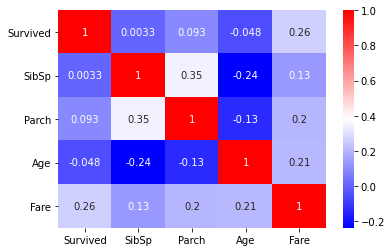

In [188]:
sns.heatmap(combined[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, cmap = "bwr")
plt.show()

Fare has the highest correlation with the Survived column. The rest of the independent variables don't seem very highly correlated with Survived. That is to say...there are not alot of linear relationships between the independent and dependent variables. There does seem to be some correlation between the independent variables though. This could be an issue for some regression models if there is a significant amount of colinearity. I will test for this now.

In [189]:
vifdf = combined[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_male']]     

vif_scores = pd.DataFrame()
vif_scores["features"] = vifdf.columns

vif_scores["VIF"] = [variance_inflation_factor(vifdf.values, x) for x in range(len(vifdf.columns))]

vif_scores

,features,VIF
0,Pclass,4.250485
1,Age,4.144098
2,SibSp,1.495838
3,Parch,1.458687
4,Fare,1.765859
5,is_male,2.966084


Luckily, there are no features with a VIF over 5, so there isn't any strong multicolinearity within our data. 
I can proceed without this worry in mind.

#### Analysis of Fare 

In [190]:
combined["Fare"].describe()

count    1299.000000
mean       32.555112
std        50.677613
min         0.000000
25%         7.895800
50%        14.454200
75%        30.597900
max       512.329200
Name: Fare, dtype: float64

Again, the descriptive statistics above indicate heavy skewness in the data.

In [191]:
combined["Fare"].mode()

0    8.05
dtype: float64

In [192]:
fare_mode = combined[combined["Fare"] == 8.05]
fare_count = fare_mode["Fare"].count()

fare_count

60

The ticket value of \\$8.05 appeared most in the dataset, though only 60 of the 1299 passengers paid this amount.

In [193]:
combined["Fare"].median()

14.4542

The exact middle ticket value of the dataset was \\$14.45

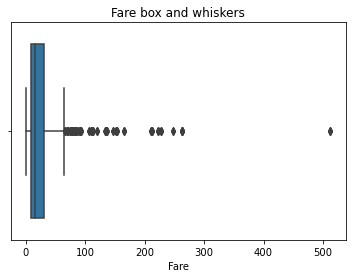

In [194]:
sns.boxplot(combined['Fare'])
plt.title("Fare box and whiskers")
plt.show()

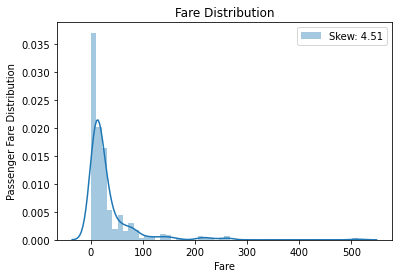

In [195]:
sns.distplot(combined['Fare'], label = 'Skew: {skew:.2f}'.format(skew = combined['Fare'].skew()))
plt.title("Fare Distribution")
plt.ylabel('Passenger Fare Distribution')
plt.legend()
plt.show()

Shown above is the distribution of passenger fare. As suspected, both the distribution plot and box plot show that the data is strongly skewed right. This data will need to be tranformed before training the different machine learning models as it can impact the accuracy of predictions. I will apply log tranformation to fix this issue. 


In [196]:
#Log tranformation to fix skewness
combined["Fare"] = combined["Fare"].map(lambda fare: np.log(fare) if fare > 0 else 0)

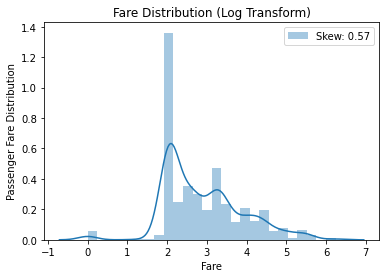

In [197]:
sns.distplot(combined['Fare'], label = 'Skew: {skew:.2f}'.format(skew = combined['Fare'].skew()))
plt.title("Fare Distribution (Log Transform)")
plt.ylabel('Passenger Fare Distribution')
plt.legend()
plt.show()

The skewness of fare has been significantly decreased from the data transformation. 

#### Age
Though I wasn't able see any signs of a clear linear relationship between age and survival, that doesn't mean a relationship doesn't exist. Another good way of checking for other types of relationships are through the use of histograms. Below is a breakdown of age distribution by survival outcome. The passengers have been split into bins of 20. That is the passengers are split according to their age into 20 equally sized groups. The number of passengers in each group is then counted.

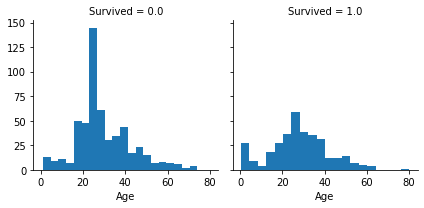

In [198]:
grid = sns.FacetGrid(combined, col = "Survived")
grid.map(plt.hist, "Age", bins=20)
plt.show()

Below is the distribution of passenger ages. The shape looks very similar to the above visualization that shows the age distributions broken down by survival outcome. This is problematic because I'm not entirely sure that the above graph is measuring anything besides the population's age distribution. A large number of younger children seem to be surviving according to the above histogram, but that might just be because there were a lot of younger children in general. I'll need to calculate the survival rates of each age group before I'm convinced that younger children had a survival advantage. The problem here is similar to the idea that geographic profiling maps are basically just population maps.

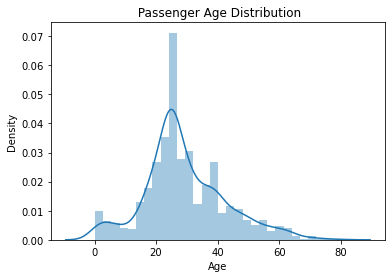

In [199]:
sns.distplot(combined["Age"])
plt.title(" Passenger Age Distribution")
plt.show()

In [200]:
temp_age_bins = pd.DataFrame()
temp_age_bins["Age Bin"] = pd.cut(combined["Age"], 5)
temp_age_bins["Survival Rate"] = combined["Survived"]
temp_age_bins.dropna()
grouped_bins = temp_age_bins.groupby("Age Bin", as_index = False).mean().sort_values(by="Age Bin")
grouped_bins

,Age Bin,Survival Rate
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


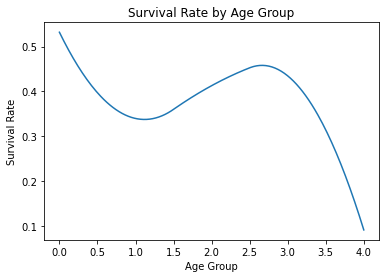

In [201]:
newx = np.linspace(grouped_bins.index.min(), grouped_bins.index.max(), 200)
spline = make_interp_spline(grouped_bins.index, grouped_bins["Survival Rate"], k=2)
smoothy = spline(newx)
plt.plot(newx, smoothy)
#grouped_bins.plot()
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

After seperating passengers by age group and comparing the different age group's survival rates, I am convinced that age matters. Age will be included as a feature for training the ML models.  

The dataset is ready for more pre-processing tasks. The next task to engineer some new features from existing features to extract some more meaningful input for the data model.

## 3. Feature Engineering and Data Pre-proccesing 

### 3.1 Feature Engineering
This next portion deals with feature engineering. Quality feature engineering can make a big difference in the accuracy of a model. Feature engineering is large in part a creative problem solving exercise. It all comes down to synthesizing new information from the existing information in the data set. Feature engineering is large in part a creative problem solving exercise. Finding features that can add to model performance isn't always straight forward. 

In [202]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,S,1


Through exploratory data analyis I found that fare, pclass, sex, and age seem to determine survival outcomes. However, there could be more inputs useful for the machine learning models that I have yet discover. Before I begin synthesizing new features, I will clean this dataset of columns I will not be using for the machine learning model. 

In [203]:
combined.drop(["Sex", "PassengerId"], inplace = True, axis = 1)

In [204]:
combined.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male
0,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1.981001,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.266662,C,0
2,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.070022,S,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.972177,S,0
4,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.085672,S,1


I have decided to drop sex, because I already have a dummy variable column representing that information. 

I also dropped PassengerId because it's just acts like a surrogate key. It doesn't provide any meaningful information for the model.

 #### Derived Features 


#### Family units
The columns SibSp and Parch provide information about who was traveling together. Information from these columns can be combined to find family size. This may have had an impact on likelihood of survival because if someone was alone there may be room for them on a lifeboat. If there was a large family, they might have been more likely to choose to stay together. This would impact their chances of getting spots on a lifeboat.   

In [205]:
#Deriving FamilySize
combined["FamilySize"] = combined["SibSp"] + combined["Parch"] + 1
pd.to_numeric(combined["FamilySize"], errors = "coerce")

0       2
1       2
2       1
3       2
4       1
       ..
1294    1
1295    1
1296    1
1297    1
1298    3
Name: FamilySize, Length: 1299, dtype: int64

In [206]:
# Cecking for nulls after using coerce parameter. 
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    881 non-null    float64
 1   Pclass      1299 non-null   int64  
 2   Name        1299 non-null   object 
 3   Age         1299 non-null   float64
 4   SibSp       1299 non-null   int64  
 5   Parch       1299 non-null   int64  
 6   Ticket      1299 non-null   object 
 7   Fare        1299 non-null   float64
 8   Embarked    1299 non-null   object 
 9   is_male     1299 non-null   int64  
 10  FamilySize  1299 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 111.8+ KB


In [207]:
combined.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,is_male,FamilySize
0,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1.981001,S,1,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.266662,C,0,2
2,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.070022,S,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.972177,S,0,2
4,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.085672,S,1,1


I will now check for a linear correlation between FamilySize and Survived.

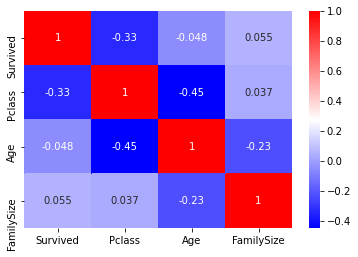

In [208]:
sns.heatmap(combined[["Survived", "Pclass", "Age", "FamilySize"]].corr(), annot = True, cmap = "bwr")
plt.show()

There does seem to be a negative linear correlation with age, but not much of one with survival. I will now check for different relationships between family size and survival. 

In [209]:
# Average Survival Rate of passengers with different family sizes
family_survival = combined[["Survived", "FamilySize"]].groupby("FamilySize", as_index = False).mean()
family_survival.dropna(inplace=True)
family_survival

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.052632
6,7,0.333333
7,8,0.000000


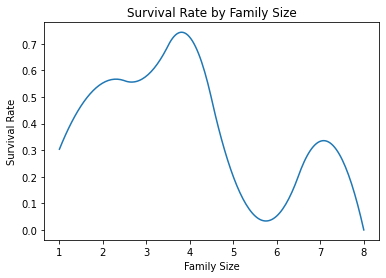

In [210]:
newx = np.linspace(family_survival["FamilySize"].min(), family_survival["FamilySize"].max(), 200)
spline = make_interp_spline(family_survival["FamilySize"], family_survival["Survived"], k=2)
smoothy = spline(newx)
plt.plot(newx, smoothy)
#grouped_bins.plot()
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

The chart above suggests that people who were alone didn't do as well as small families. When the family size increased from four, survival outcome began to decrease. I would guess that the slight increase at 7 family members might have something to do with class or gender makeup. 

In [211]:
combined["is_alone"] = combined["FamilySize"].map(lambda x: 0 if x>1 else 1)

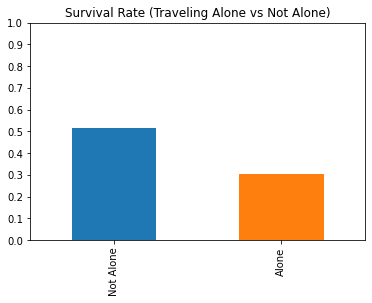

In [212]:
alone = combined[["is_alone", "Survived"]].groupby("is_alone", as_index = False).mean()
alone.plot(kind="bar", x= "is_alone", y="Survived", legend = False, xlabel = '', yticks=np.arange(0,1.1,.1), ylim = [0,1], title = "Survival Rate (Traveling Alone vs Not Alone)")
plt.xticks()
plt.xticks(ticks=[0,1], labels = ["Not Alone", "Alone"])
ax = plt.gca()
ax.get_children()[1].set_color("tab:orange")

The table above suggests that people who were not alone generally had better outcomes than people who were. This finding is the opposite of what I had initially expected. The inputs of the is_alone column will reduce the amount of total columns that the model will need process. This is because it contains similar information as the SibSp, Parch, and FamilySize columns. For this reason I will keep the is_alone column and drop the others.  

In [213]:
combined.drop(["SibSp", "Parch", "FamilySize"], axis = 1, inplace = True)
combined.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,is_male,is_alone
0,0.0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,1.981001,S,1,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,4.266662,C,0,0
2,1.0,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,2.070022,S,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,3.972177,S,0,0
4,0.0,3,"Allen, Mr. William Henry",35.0,373450,2.085672,S,1,1


#### Ticket Prefix
While researching the meaning of the ticket format, I discovered a [thread](https://www.kaggle.com/c/titanic/discussion/11127) with people trying to parse out what the differet ticket formats meant. Someone in the thread made an interesting comment about how it doesn't matter for our model that we know how the formatting works. All that matters is that the model can determine if the values impact survival. I though this was interesting, so I decide to leave it in the dataset. I'm going to set my curiosity about the meaning of the ticket numbers aside and simply try to discover some patterns.

In [214]:
pd.set_option('display.max_rows', None)
combined["Ticket"].value_counts().sort_values()


A./5. 2152            1
C.A. 49867            1
315097                1
SOTON/O2 3101284      1
345775                1
7538                  1
PC 17482              1
231945                1
350048                1
16988                 1
349228                1
350416                1
A.5. 11206            1
349241                1
345780                1
334912                1
349213                1
370373                1
349203                1
244310                1
239854                1
370368                1
330979                1
112277                1
2676                  1
315083                1
111320                1
350036                1
347085                1
S.P. 3464             1
315095                1
112901                1
2685                  1
113514                1
350053                1
CA. 2314              1
2673                  1
C.A. 33111            1
349257                1
343095                1
364506                1
13214           

In [215]:
combined[combined["Ticket"]=="1601"]

,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,is_male,is_alone
73,1.0,3,"Bing, Mr. Lee",32.0,1601,4.034166,S,1,1
166,0.0,3,"Ling, Mr. Lee",28.0,1601,4.034166,S,1,1
502,1.0,3,"Lang, Mr. Fang",26.0,1601,4.034166,S,1,1
636,1.0,3,"Foo, Mr. Choong",25.0,1601,4.034166,S,1,1
685,1.0,3,"Lam, Mr. Ali",25.0,1601,4.034166,S,1,1
818,0.0,3,"Lam, Mr. Len",25.0,1601,4.034166,S,1,1
830,1.0,3,"Chip, Mr. Chang",32.0,1601,4.034166,S,1,1
920,NaN,3,"Hee, Mr. Ling",25.0,1601,4.034166,S,1,1


In [216]:
combined[combined["Ticket"]=="CA 2144"]

,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,is_male,is_alone
58,0.0,3,"Goodwin, Master. William Frederick",11.0,CA 2144,3.848018,S,1,0
70,0.0,3,"Goodwin, Miss. Lillian Amy",16.0,CA 2144,3.848018,S,0,0
379,0.0,3,"Goodwin, Master. Sidney Leonard",1.0,CA 2144,3.848018,S,1,0
473,0.0,3,"Goodwin, Master. Harold Victor",9.0,CA 2144,3.848018,S,1,0
671,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",43.0,CA 2144,3.848018,S,0,0
676,0.0,3,"Goodwin, Mr. Charles Edward",14.0,CA 2144,3.848018,S,1,0
1020,NaN,3,"Goodwin, Mr. Charles Frederick",40.0,CA 2144,3.848018,S,1,0
1021,NaN,3,"Goodwin, Miss. Jessie Allis",10.0,CA 2144,3.848018,S,0,0


In [217]:
combined[combined["Ticket"]=="S.O.C. 14879"]

,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,is_male,is_alone
71,0.0,2,"Hood, Mr. Ambrose Jr",21.0,S.O.C. 14879,4.297285,S,1,1
118,0.0,2,"Hickman, Mr. Stanley George",21.0,S.O.C. 14879,4.297285,S,1,0
378,0.0,2,"Davies, Mr. Charles Henry",18.0,S.O.C. 14879,4.297285,S,1,1
648,0.0,2,"Hickman, Mr. Leonard Mark",24.0,S.O.C. 14879,4.297285,S,1,0
658,0.0,2,"Hickman, Mr. Lewis",32.0,S.O.C. 14879,4.297285,S,1,0
1093,NaN,2,"Deacon, Mr. Percy William",17.0,S.O.C. 14879,4.297285,S,1,1
1233,NaN,2,"Dibden, Mr. William",18.0,S.O.C. 14879,4.297285,S,1,1


It does look like there is some pattern developing. There are many duplicated ticket numbers. The holders of these ticket tend to be members of the same family or at least class. Some tickets have prefixes and some are just numbers. I'm going to parse the ticket strings further to see if the numbers and prefixes reveal any patterns on their own. 

In [218]:
combined["TicketPrefix"] = combined["Ticket"].str.extract(r'([A-Z]+[./]*[\d.]*)')

In [219]:
combined.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,is_male,is_alone,TicketPrefix
0,0.0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,1.981001,S,1,0,A/5
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,4.266662,C,0,0,PC
2,1.0,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,2.070022,S,0,1,STON/
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,3.972177,S,0,0,NaN
4,0.0,3,"Allen, Mr. William Henry",35.0,373450,2.085672,S,1,1,NaN


In [220]:
combined[combined["Ticket"].str.contains(r'(STON)')]

,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,is_male,is_alone,TicketPrefix
2,1.0,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,2.070022,S,0,1,STON/
113,0.0,3,"Pekoniemi, Mr. Edvard",21.0,STON/O 2. 3101294,2.070022,S,1,1,STON/
140,1.0,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",24.0,STON/O2. 3101279,2.763170,S,0,0,STON/
170,0.0,3,"Sivola, Mr. Antti Wilhelm",21.0,STON/O 2. 3101280,2.070022,S,1,1,STON/
211,1.0,3,"Honkanen, Miss. Eliina",27.0,STON/O2. 3101283,2.070022,S,0,1,STON/
238,0.0,3,"Maenpaa, Mr. Matti Alexanteri",22.0,STON/O 2. 3101275,1.963610,S,1,1,STON/
375,0.0,3,"Tikkanen, Mr. Juho",32.0,STON/O 2. 3101293,2.070022,S,1,1,STON/
393,1.0,3,"Niskanen, Mr. Juha",39.0,STON/O 2. 3101289,2.070022,S,1,1,STON/
396,0.0,3,"Hakkarainen, Mr. Pekka Pietari",28.0,STON/O2. 3101279,2.763170,S,1,0,STON/
407,1.0,3,"Sundman, Mr. Johan Julian",44.0,STON/O 2. 3101269,2.070022,S,1,1,STON/


I'm running into a problem where I cannot seem to extract the entire ticket prefix when the prefix includes "STON/" This probably isn't a big deal since the training set only contains STON/O2. However, the test set contains at least one ticket prefix of STON/OQ. I'm getting the feeling that this similar problem may exist with other prefix's. Since, it doesn't seem that the slashes or periods mean anything I'm going to clean up the ticket column by removing them.

In [221]:
combined["Ticket"] = combined["Ticket"].str.replace(r'([./])', '')
combined["Ticket"] = combined["Ticket"].str.upper()

In [222]:
combined["TicketPrefix"] = combined["Ticket"].str.extract(r'([A-Z]+[\d]*)')
combined["TicketPrefix"].fillna("None", inplace = True) 
combined.drop("Ticket", axis = 1, inplace = True)

In [223]:
combined.head(11)

,Survived,Pclass,Name,Age,Fare,Embarked,is_male,is_alone,TicketPrefix
0,0.0,3,"Braund, Mr. Owen Harris",22.0,1.981001,S,1,0,A5
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,4.266662,C,0,0,PC
2,1.0,3,"Heikkinen, Miss. Laina",26.0,2.070022,S,0,1,STONO2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,3.972177,S,0,0,None
4,0.0,3,"Allen, Mr. William Henry",35.0,2.085672,S,1,1,None
5,0.0,3,"Moran, Mr. James",25.0,2.135148,Q,1,1,None
6,0.0,1,"McCarthy, Mr. Timothy J",54.0,3.948596,S,1,1,None
7,0.0,3,"Palsson, Master. Gosta Leonard",2.0,3.048088,S,1,0,None
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,2.409941,S,0,0,None
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,3.403555,C,0,0,None


After doing some more research I found that ticket agents had books with numbered tickets in them. This ties the ticket to the location it was purchased. Further, since receipt books are usually sequential, it could help uncover who was traveling with who. Some passengers held the same ticket number, which almost certainly indicates they were traveling together. This information could help fill missing cabin values when using in conjuction with name, fare, class etc. This is something I would like to visit later. But, since who traveled with who is similar to my is_alone column and I likely have the most impactful predictors in the dataset, I will leave this out of my analysis for now. 

####  Title 
There are some interesting titles in the dataset under the name columns. One of them, "Master" is in the first ten rows of the dataset. This may make a difference in survival outcome. I have always heard that the captain goes down with the ship. 

In [224]:
combined.iloc[7:8]

,Survived,Pclass,Name,Age,Fare,Embarked,is_male,is_alone,TicketPrefix
7,0.0,3,"Palsson, Master. Gosta Leonard",2.0,3.048088,S,1,0,None


In [225]:
combined["Title"] = combined["Name"].str.extract(r'(\w+\.)')

In [226]:
combined.head()

,Survived,Pclass,Name,Age,Fare,Embarked,is_male,is_alone,TicketPrefix,Title
0,0.0,3,"Braund, Mr. Owen Harris",22.0,1.981001,S,1,0,A5,Mr.
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,4.266662,C,0,0,PC,Mrs.
2,1.0,3,"Heikkinen, Miss. Laina",26.0,2.070022,S,0,1,STONO2,Miss.
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,3.972177,S,0,0,None,Mrs.
4,0.0,3,"Allen, Mr. William Henry",35.0,2.085672,S,1,1,None,Mr.


Now I can check what the different titles are and see if there are any associated patterns with survival rate.  

In [227]:
female_title_count = combined[combined["is_male"] == 0].groupby("Title")
female_title_count["Title"].count()

Title
Countess.      1
Dona.          1
Dr.            1
Lady.          1
Miss.        255
Mlle.          2
Mme.           1
Mrs.         197
Ms.            2
Name: Title, dtype: int64

In [228]:
male_title_count = combined[combined["is_male"] == 1].groupby("Title")
male_title_count["Title"].count()

Title
Capt.          1
Col.           4
Don.           1
Dr.            7
Jonkheer.      1
Major.         2
Master.       60
Mr.          753
Rev.           8
Sir.           1
Name: Title, dtype: int64

There are 4 different popular titles "Miss.", "Mrs.", "Mr.", and "Master.". A couple of the titles look to be equivelant to eachother, but spelled differently. "Mlle." (mademousille) and "Ms." are both forms of "Miss.".  
The rest can be considered "unique" titles. I will split them up into these catagories and check their survival rates.

In [229]:
combined["Title"] = combined["Title"].replace(['Lady.', 'Countess.','Capt.', 'Col.', 'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Rare.')
combined["Title"] = combined["Title"].replace(['Mlle.', 'Ms.'], "Miss.")    
combined["Title"] = combined["Title"].replace('Mme.', 'Mrs.')   

In [230]:
combined[["Title", "Survived"]].groupby("Title", as_index = False).mean() 

,Title,Survived
0,Master.,0.589744
1,Miss.,0.711111
2,Mr.,0.157895
3,Mrs.,0.793651
4,Rare.,0.347826


In [231]:
combined[["Title", "Age"]].groupby("Title", as_index = False).mean() 

,Title,Age
0,Master.,6.651333
1,Miss.,22.141274
2,Mr.,31.167331
3,Mrs.,35.969697
4,Rare.,44.965517


It is clear that titles make a difference. This isn't surprising considering title is tied to sex. 
I've also uncovered another piece of evidence that supports that age matters. The title "Master." is a term given to boys. The average age of those with this title was around 7 years of age. Though males generally had bad survival outcomes, this wasn't as true for boys. 
Since I have finished extracting the most important information out of the name column, I can drop it now.

In [232]:
combined.drop("Name", inplace = True, axis = 1)

In [233]:
combined.head()

,Survived,Pclass,Age,Fare,Embarked,is_male,is_alone,TicketPrefix,Title
0,0.0,3,22.0,1.981001,S,1,0,A5,Mr.
1,1.0,1,38.0,4.266662,C,0,0,PC,Mrs.
2,1.0,3,26.0,2.070022,S,0,1,STONO2,Miss.
3,1.0,1,35.0,3.972177,S,0,0,None,Mrs.
4,0.0,3,35.0,2.085672,S,1,1,None,Mr.


### 3.2 Data Preprocessing

#### Age Band
Continous variables are often sorted into different catagories based on values before being input into a machine learning model. This is called binning. The bins are ordinal numbers. This can improve the performance of some ML models.

In [234]:
combined["Age"] = np.where((combined.Age <= 16), 0, combined.Age)
combined["Age"] = np.where((combined.Age > 16) & (combined.Age <= 32), 1, combined.Age)
combined["Age"] = np.where((combined.Age > 32) & (combined.Age <= 48), 2, combined.Age)
combined["Age"] = np.where((combined.Age > 48) & (combined.Age <= 64), 3, combined.Age)
combined["Age"] = np.where((combined.Age > 64), 4, combined.Age)

In [235]:
combined["Age"]=combined["Age"].astype("int64") 


In [236]:
combined.head()

,Survived,Pclass,Age,Fare,Embarked,is_male,is_alone,TicketPrefix,Title
0,0.0,3,1,1.981001,S,1,0,A5,Mr.
1,1.0,1,2,4.266662,C,0,0,PC,Mrs.
2,1.0,3,1,2.070022,S,0,1,STONO2,Miss.
3,1.0,1,2,3.972177,S,0,0,None,Mrs.
4,0.0,3,2,2.085672,S,1,1,None,Mr.


#### Fare Band

In [237]:
# Sort into bins

temp_fare_bins = pd.DataFrame()
temp_fare_bins["Fare Bin"] = pd.cut(combined["Fare"], 4)
temp_fare_bins["Survival Rate"] = combined["Survived"]
temp_fare_bins.dropna()
grouped_bins = temp_fare_bins.groupby("Fare Bin", as_index = False).mean().sort_values(by="Fare Bin")
grouped_bins

,Fare Bin,Survival Rate
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [238]:
# Convert fare into ordinal values based on which bin the fare falls into. 

combined["Fare"] = np.where((combined.Fare <= 1.56), 0, combined.Fare)
combined["Fare"] = np.where((combined.Fare > 1.56) & (combined.Fare <=3.119),1,combined.Fare)
combined["Fare"] = np.where((combined.Fare > 3.119) & (combined.Fare <= 4.679), 2, combined.Fare)
combined["Fare"] = np.where((combined.Fare > 4.679), 3, combined.Fare)

In [239]:
# Convert fare into int64

combined["Fare"] = combined["Fare"].astype("int64")

#### Age*Class
This engineered feature is interesting. Jason Chong, the author of the titanic tutorial notebook that this notebook is based on suggested this feature. It took me a second to understand his reasoning because combining two features that were originally completely different in scale and meaning was a novel concept to me. It isn't explained in his notebook, but I believe the feature works because the ordinal values are traveling in the same direction, especially in terms of likely survival outcome. For example, people in class three are less likely to survive than in class one. Now, if they are in class three and fall into a higher age bin, they are even more less likely to have a good survival outcome. This feature multiplies those two different factors together, which provides the model with an impactful input.       

In [240]:
combined["Age*Class"] = combined["Age"] * combined["Pclass"]

In [241]:
combined.head()

,Survived,Pclass,Age,Fare,Embarked,is_male,is_alone,TicketPrefix,Title,Age*Class
0,0.0,3,1,1,S,1,0,A5,Mr.,3
1,1.0,1,2,2,C,0,0,PC,Mrs.,2
2,1.0,3,1,1,S,0,1,STONO2,Miss.,3
3,1.0,1,2,2,S,0,0,None,Mrs.,2
4,0.0,3,2,1,S,1,1,None,Mr.,6



All of my basic exploratory data analysis is complete. However, I still need to convert the rest of the dataset values into dummy variables. Dummy variables are easier for a machine learning model to process. They provide the numerical input required for many machine learning models to make predictions. 

In [242]:
combined = pd.get_dummies(combined, columns = ["Embarked"])

In [243]:
combined = pd.get_dummies(combined, columns = ["Title"])

In [244]:
combined = pd.get_dummies(combined, columns = ["TicketPrefix"])

In [245]:
pd.set_option('display.max_columns', None)
combined.head()

,Survived,Pclass,Age,Fare,is_male,is_alone,Age*Class,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare.,TicketPrefix_A,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_AS,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_None,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONO2,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO,TicketPrefix_STONO2,TicketPrefix_STONOQ,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
0,0.0,3,1,1,1,0,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,2,2,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,3,1,1,0,1,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,2,2,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,3,2,1,1,1,6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Training some models


To start I will need to split my cleaned and preproccessed dataset back into training and test sets.

In [246]:
train = combined[:881]
train["Survived"] = train["Survived"].astype("int64")
train.tail()

,Survived,Pclass,Age,Fare,is_male,is_alone,Age*Class,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare.,TicketPrefix_A,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_AS,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_None,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONO2,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO,TicketPrefix_STONO2,TicketPrefix_STONOQ,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
876,0,2,1,1,1,1,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
877,1,1,1,2,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
878,0,3,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
879,1,1,1,2,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
880,0,3,1,1,1,1,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [247]:
test = combined[881:]
test = test.drop("Survived", axis = 1)
test.head()

,Pclass,Age,Fare,is_male,is_alone,Age*Class,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare.,TicketPrefix_A,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ3,TicketPrefix_AQ4,TicketPrefix_AS,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CASOTON,TicketPrefix_FA,TicketPrefix_FC,TicketPrefix_FCC,TicketPrefix_LINE,TicketPrefix_LP,TicketPrefix_None,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_PPP,TicketPrefix_SC,TicketPrefix_SCA3,TicketPrefix_SCA4,TicketPrefix_SCAH,TicketPrefix_SCOW,TicketPrefix_SCPARIS,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOPP,TicketPrefix_SOTONO2,TicketPrefix_SOTONOQ,TicketPrefix_SP,TicketPrefix_STONO,TicketPrefix_STONO2,TicketPrefix_STONOQ,TicketPrefix_SWPP,TicketPrefix_WC,TicketPrefix_WEP
881,3,2,1,1,1,6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
882,3,2,1,0,0,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
883,2,3,1,1,1,6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
884,3,1,1,1,1,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
885,3,1,1,0,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Since the whole point is to make predictions for the Survived column, I have dropped this column from the test data set. I will replace it with the models predictions later on.  

I have chosen just a few classification machine learning models to try out. If the performance doesn't reach at least 80% accuracy in my tests, I can start looking at different models and revisiting inputs. 

I have selected the following models...

- Logistical Regression
- K-nearest Neighbors
- Gaussian Naive Bayes
- Random Forest


### Splitting up independent and dependent variables for training
I will need to instruct the model on which columns will be the inputs and outputs. Inputs will be the predictor variables and outputs will be the response variables.  

In [248]:
train_x = train.drop("Survived", axis = 1) 
train_y = train["Survived"]
test_x = test

### Fitting the models
A quick side note on .score() method. This method doesn't need the predictions from the test set to calculate a score. Kaggle user Francesc Sala clarifies in a kaggle thread on how this works, "logreg.score(X_train,Y_train) is measuring the accuracy of the model against the training data. (How well the model explains the data it was trained with). <-- But note that this has nothing to do with test data." Original post can be viewed [here](https://www.kaggle.com/getting-started/27261).



#### Logistic Regression

In [249]:
# Instantiate
logreg = LogisticRegression()

#Fitting
logreg.fit(train_x, train_y)

#Predicting 
logreg.predict(test_x)

#Accuracy test
print("Score: {}".format(logreg.score(train_x, train_y)))

Score: 0.8183881952326901


#### K-nearest neighbors


In [250]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
knn.predict(test_x)
print("Score: {}".format(knn.score(train_x, train_y)))

Score: 0.8501702610669694


#### Gaussian Naive Bayes 
...what happened here.

In [251]:
gauss = GaussianNB()
gauss.fit(train_x, train_y)
gauss.predict(test_x)
print("Score: {}".format(gauss.score(train_x, train_y)))

Score: 0.4551645856980704


#### Random Forest

In [252]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf.predict(test_x)
print("Score: {}".format(rf.score(train_x, train_y)))

Score: 0.8796821793416572


## Model Performance and Tuning

### Accuracy

In [253]:
acc = pd.DataFrame()
acc["Model"] = [i for i in [
    "Logistical Regression",
    "K-nearest Neighbors",
    "Gaussian Naive Bayes",
    "Random Forest"
]]
acc["Values"] = [i.score(train_x, train_y) for i in [logreg, knn, gauss, rf]]

In [254]:
acc.sort_values(by = "Values", ascending= False)

,Model,Values
3,Random Forest,0.879682
1,K-nearest Neighbors,0.850170
0,Logistical Regression,0.818388
2,Gaussian Naive Bayes,0.455165


### K-Fold Cross Validation
The scoring tests show that Random Forest is in the lead for prediction accuracy at the moment. However, as stated above, the .score() method is not making predictions on out of sample data. I will use k-fold cross validation to test the model on data it hasn't seen before. The way this works is by splitting up the training set further and keeping a subset of the data apart from the rest for testing purposes. This process of splitting training, and testing happens repeatedly until each subset of data has had a turn being a testing subset and a training subset. A visual example is provided for additional reference. The source video for this image can be found here. 


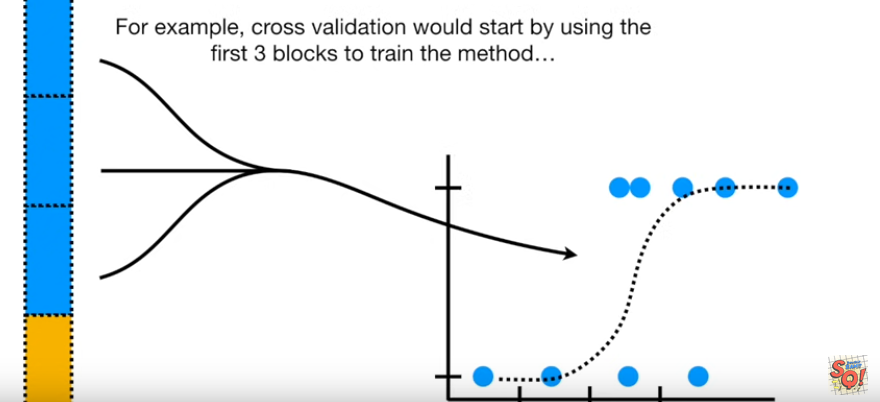

In [255]:
from IPython.display import Image
Image("Files/Titanic/kfoldcrossvalidation.png")

The image show the testing subset in orange and the training subset in blue. In each splitting, training, and testing iteration, the orange block will change. The iterations will continue until every block has had a chance to be the orange block (i.e, the testing subset).

In [256]:
models = []
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(RandomForestClassifier())

In [257]:
kfcv_results = []
for m in models:
    kfcv_results.append(cross_val_score(m, train_x, train_y, scoring = 'accuracy', cv =10))

In [258]:
kfcv_mean = [results.mean() for results in kfcv_results]
kfcv_stdev = [results.std() for results in kfcv_results]
kfcv_res_df = pd.DataFrame({"Cross Validation Mean": kfcv_mean, "Cross Validation Standard Deviation": kfcv_stdev, "Classifier": ["Logistical Regression",
    "K-nearest Neighbors",
    "Gaussian Naive Bayes",
    "Random Forest"]}) 

kfcv_res_df.sort_values(by="Cross Validation Mean", ascending = False)

,Cross Validation Mean,Cross Validation Standard Deviation,Classifier
1,0.807074,0.042926,K-nearest Neighbors
0,0.805924,0.033350,Logistical Regression
3,0.802528,0.036164,Random Forest
2,0.432431,0.012664,Gaussian Naive Bayes


The classifier with the best average performance was K-Nearest Neighbors. Even taking into consideration the lower standard deviation of Logistical Regression, KNN is still out performing it. I will proceed with KNN as my model of choice. 

### Tuning KNN Hyperparameters
Previously, I used the default parameters when training the KNN model. These parameters are not neccesarily ideal. Changing the model parameters can have a big effect on model accuracy. I will use GridSearchCV to try to find the optimal parameters for number of neighbors and distance metric. These are the two parameters that will make the biggest difference in model accuracy. 

In [259]:
# hyper parameters

p = [1,2]
n_neighbors = list(range(1,30))

# Converting to dictionary

hyperparameters = dict(n_neighbors = n_neighbors, p = p)

# instantiate new knn classifier
knn_2 = KNeighborsClassifier() 

# GridSearch

grid = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fitting model
best = grid.fit(train_x, train_y)

print("Optimal n_neighbors: ", best.best_estimator_.get_params()["n_neighbors"])
print("Optimal Distance Paramater (p): ", best.best_estimator_.get_params()["p"])

Optimal n_neighbors:  5
Optimal Distance Paramater (p):  2


That was anti-climactic. It seems that the optimal paramaters are actually the default parameters in this case. It's time to prepare the data for submission.  

## Submission 1

In [260]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
submission_array = knn.predict(test_x)
len(submission_array)

418

In [261]:
submission_array

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [262]:
test_original = pd.read_csv("test.csv") 

In [263]:
test_original.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [264]:
submission = pd.DataFrame({"PassengerId": test_original["PassengerId"], "Survived": submission_array})

In [265]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [266]:
submission.to_csv("Files/Titanic/firstsubmission", index = False)

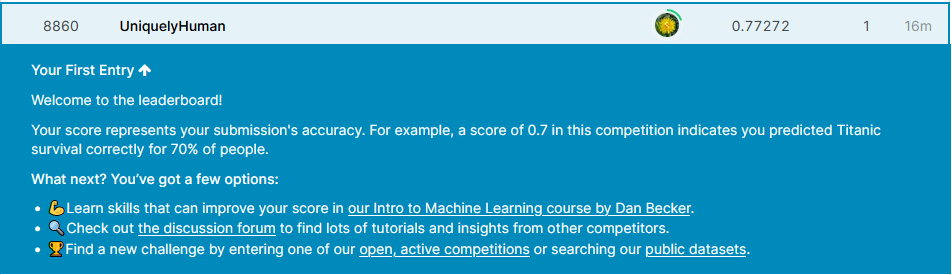

In [267]:
from IPython.display import Image
Image("Files/Titanic/FirstTry.png")

This was...disappointing. Even with feature engineering, cross validation and hyperparameter tuning, I am not meeting my goal of 80% accuracy. I hypothesize three reasons for this. 

- I have chosen some feature that has contributed to lowering the accuracy of the model. 
- I have not chosen a good enough algorithm. 
- I failed to tune KNN correctly.

The easy part would be to try some additional algorithms to see if they perform better. I will try that now. 

## Training Models Part 2

### SVC
I've seen this model perform well in other notebooks. I will attempt my next submission using this model. 

In [268]:
svc = SVC()
svc.fit(train_x, train_y)
svc.predict(test_x)
score = svc.score(train_x, train_y)
print(" SVC Before Cross Validation Score: ", score)

 SVC Before Cross Validation Score:  0.8331441543700341


In [269]:
scv_cv_score_array = cross_val_score(svc, train_x, train_y, scoring = "accuracy", cv = 10)
avg_scv_score = scv_cv_score_array.mean()
scv_stdev = scv_cv_score_array.std()

print("Mean SVC cross validation score: ", avg_scv_score)
print("SVC cross validation standard deviation: ", scv_stdev)

Mean SVC cross validation score:  0.8036516853932584
SVC cross validation standard deviation:  0.04421829869767365


The SVC score using cross validation doesn't appear to be performing any better than the other yet. I will now check if that holds true after hyper-parameter tuning. 

In [270]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ["rbf"]
params = dict(C=C, gamma=gamma, kernel=kernel)
params2 = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
params
grid = GridSearchCV(SVC(), params, refit = True)

grid.fit(train_x, train_y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [271]:
best_parameters = grid.best_params_
best_parameters

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [272]:
svc = SVC(C = 100, gamma = 0.01, kernel = "rbf")
svc.fit(train_x, train_y)
submit2 = svc.predict(test_x)
score = svc.score(train_x, train_y)
print("SVC score after hyperparamter tuning: ", score)

SVC score after hyperparamter tuning:  0.8433598183881952


This is the best score I have recieved using the .score() method so far. I am ready to clean the array up for a second submission. 

In [273]:
submission_2 = pd.DataFrame({"PassengerId": test_original["PassengerId"], "Survived": submit2})
submission_2.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [274]:
submission_2.to_csv("Files/Titanic/secondsubmission", index = False)

#### Further frusterations
Changing the model did not help. My second submission scored the exact same score as my first. The next thing I will try will be to start dropping features that might be influencing the models performance.

In [275]:
train_x_no_ticket = train_x.iloc[:,0:14]
test_x_no_ticket = test_x.iloc[:,0:14]
test_x_no_ticket.head() 

,Pclass,Age,Fare,is_male,is_alone,Age*Class,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare.
881,3,2,1,1,1,6,0,1,0,0,0,1,0,0
882,3,2,1,0,0,6,0,0,1,0,0,0,1,0
883,2,3,1,1,1,6,0,1,0,0,0,1,0,0
884,3,1,1,1,1,3,0,0,1,0,0,1,0,0
885,3,1,1,0,0,3,0,0,1,0,0,0,1,0


In [276]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ["rbf"]
params = dict(C=C, gamma=gamma, kernel=kernel)
params2 = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
params
grid = GridSearchCV(SVC(), params, refit = True)

grid.fit(train_x_no_ticket, train_y)

best_parameters = grid.best_params_
best_parameters

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [277]:
svc = SVC(C = 100, gamma = 0.01, kernel = "rbf")
svc.fit(train_x_no_ticket, train_y)
submit3 = svc.predict(test_x_no_ticket)
score = svc.score(train_x_no_ticket, train_y)
print("SVC score after hyperparamter tuning: ", score)

SVC score after hyperparamter tuning:  0.8354143019296254


#### Some success
After dropping the ticket pre-fixes from the models I discovered that the accuracy bumped up.  

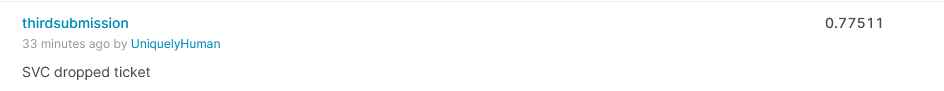

In [278]:
from IPython.display import Image
Image("Files/Titanic/ThirdTry.png")

This score is the same score that the tutorial notebook received. After doing some further research into other notebooks I have discovered that people have score above 80 using the KNN classifier. This information along with discovering that dropping the ticket prefixes increased my submission score has lead me to some conclusions. 

- I can receive a score above 80 if I continue to use KNN as my model. 
- I need to keep experimenting with different features to see if I can improve accuracy.
- I need to look more into data transformation to see if I can provide the model with better pre-processed data. 

This project will be an ongoing project of mine. I am determined to eventually get 80% on my submission. I am running out of time to submit this notebook as final project, so for now I am going to wrap this notebook up with some final conclusions. 

## Conclusion

To start I would like to restate my original hypothesis:

- Sex is an important determining factor for survival outcome.
- Ticket class is an important determining factor for survival outcome.

This hypothesis is supported by the exploratory data analyis. 

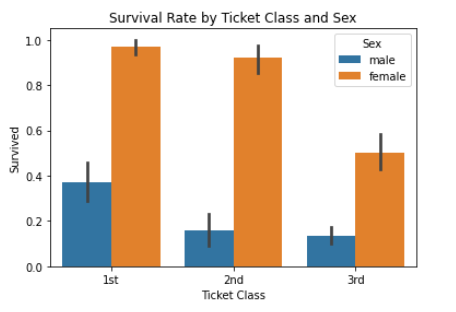

Some other interesting observations include:
 - Age had an impact on survival outcome with younger children faring better than adults
 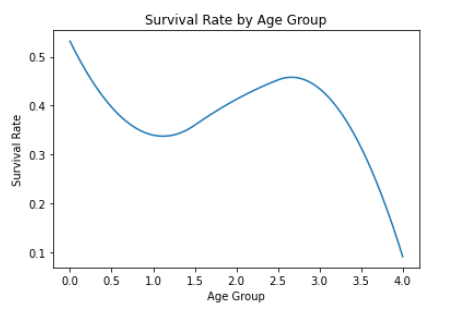
 - Traveling alone was more dangerous than traveling with someone 
 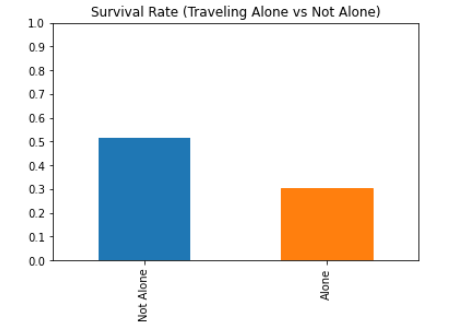
 - Where an individual embarked seemed to make a difference in survival outcome, but this is likely due to it's relationship to passenger class. 
 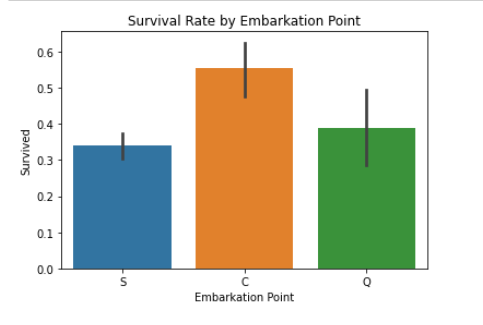
 - Title made a difference in survival outcome. This is because title is tied to gender and age. The more interesting part of this analysis concerns "Rare" titles. Those with these titles were less likely to have survived. People with rare titles tended to make up staff. So, it seems that the idea that the crew goes down with the ship holds. 
 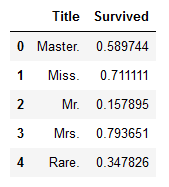
 
### Next Steps
1. Learn more about hyperparameter tuning with the k nearest neighbors algorithm 
2. Learn more about how to use feature importance to improve feature selection. My model is overfitting, so I may be choosing features that are creating noise. I need a methodical way of building the model up and slowly removing features that are not as important. 
3. Learn more about ensemble modeling and experiment more with ensemble algorithms. 
4. Learn more about algorithm selection. Multicolinearity and other underlying patterns in the data can have more of an impact on accuracy than others. Choosing models that are more forgiving of these patterns could yield better results. Alternatively, transform the data more to allow for the selected model to perform better. 
5. Gather community feedback on this project. This can help me improve my performance by knowing where I need to focus my efforts. 
6. Figure out a prettier and more effective way of delivering the summary of my findings. Jupyter notebook is awesome for the initial analysis and for an academic presentations. However, I feel like there are better mediums for delivering clear and beautiful visualizations that can help tell the story of the data in a more efficient way. 

Thanks for viewing!